# Projeto 2
## EBAC - Supermarket

Passo a passo

- Construa um aprendizado de máquina ou modelo estatístico.
- Avalie o modelo estatístico através de técnicas de modelagem aprendidas ao longo do curso.
- Apresente uma visualização de dados com os resultados obtidos.
- Faça a entrega dessa visualização de dados via GitHub. Na sua entrega deve conter uma documentação em formato Markdown ou PDF com os tópicos: Coleta de dados, modelagem e conclusões. 

### Importação das bibliotecas

In [233]:
# Bibliotecas necessárias
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



### Sobre a base de dados

kaggle_url = "https://www.kaggle.com/datasets/moro146/supermarket-eda"

Se trata de uma base de dados publica que se encontra no site Kaggle sobre as transações comerciais de um supermercado

In [234]:
df = pd.read_csv("supermarket.csv")

In [235]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


*Vamos verificar agora de que formato de dados nós temos*

In [236]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Até as datas estão precisando de tratamento do formato

In [237]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


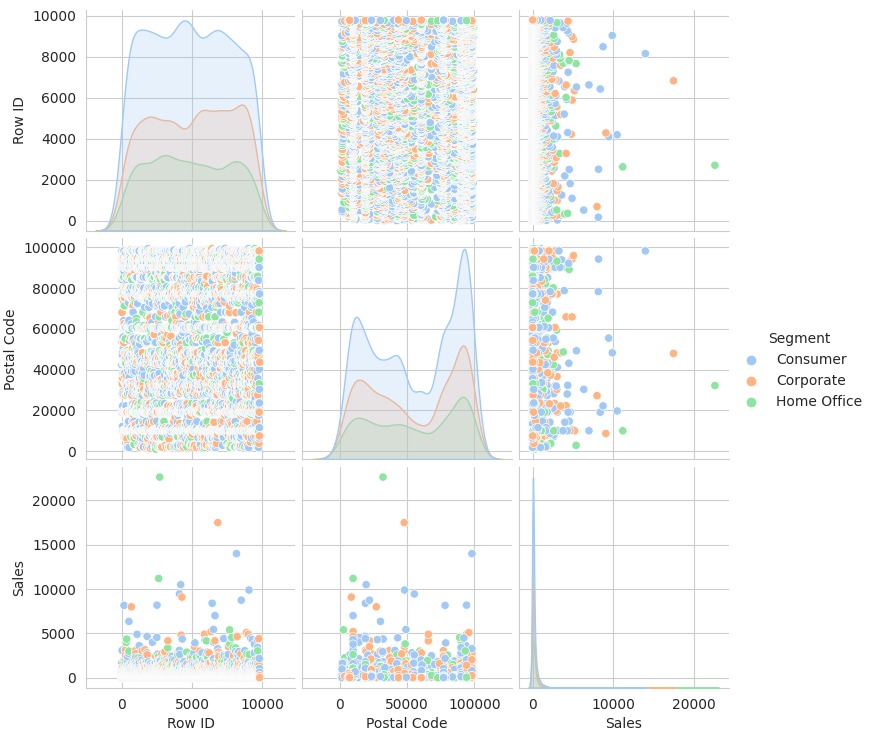

In [238]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="Segment", palette="pastel")

Podemos ver que os dados ainda estão muito acumulados e sem muita distinção, o que necessita agora é um bom trabalho de ETL at é a aplicação de um modelo de aprendizado de máqina

In [239]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [240]:
df.isna().sum() / len(df)

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.001122
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

Com esse percentual baixo podemos fazer uma exclusão das linhas

In [241]:
df.dropna(subset=['Postal Code'], inplace=True)

In [242]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

A coluna Row ID não vai ajudar na analise, precisando ser excluida.
A coluna Order ID está com informação repetida (ano e localização do pedido), precisando de modificação

In [243]:
df = df.drop(columns=['Row ID'])
df['Order ID'] = df['Order ID'].str.replace('CA-2018-', '')
df['Order ID'] = df['Order ID'].str.replace('US-2018-', '')
df['Order ID'] = df['Order ID'].str.replace('CA-2017-', '')
df['Order ID'] = df['Order ID'].str.replace('US-2017-', '')
df['Order ID'] = df['Order ID'].str.replace('CA-2016-', '')
df['Order ID'] = df['Order ID'].str.replace('US-2016-', '')
df['Order ID'] = df['Order ID'].str.replace('CA-2015-', '')
df['Order ID'] = df['Order ID'].str.replace('US-2015-', '')

In [244]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [245]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [246]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [247]:
# Criando a nova coluna 'Diferença de Dias'
df['Total Days'] = (df['Ship Date'] - df['Order Date']).dt.days


In [248]:
ordem_colunas = df.columns.tolist()
print(ordem_colunas)

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Total Days']


In [249]:
nova_ordem = ['Order ID', 'Order Date', 'Ship Date', 'Total Days', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']
df = df.reindex(columns=nova_ordem)

In [250]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Total Days                int32
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [251]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [252]:
df.loc[df['Ship Mode'] == 'Second Class', 'Ship Mode'] = 0
df.loc[df['Ship Mode'] == 'Standard Class', 'Ship Mode'] = 1
df.loc[df['Ship Mode'] == 'First Class', 'Ship Mode'] = 2
df.loc[df['Ship Mode'] == 'Same Day', 'Ship Mode'] = 3
df['Ship Mode'] = df['Ship Mode'].astype(int)

In [253]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Total Days                int32
Ship Mode                 int32
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [254]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [255]:
df.loc[df['Segment'] == 'Consumer', 'Segment'] = 0
df.loc[df['Segment'] == 'Corporate', 'Segment'] = 1
df.loc[df['Segment'] == 'Home Office', 'Segment'] = 2

In [256]:
df['Country'].unique()

array(['United States'], dtype=object)

In [257]:
df = df.drop(columns=['Country', 'Postal Code']) 

In [258]:
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [259]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [260]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [261]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [262]:
df['Category'] = le.fit_transform(df['Category'])
df['Sub-Category'] = le.fit_transform(df['Sub-Category'])

In [263]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Total Days                int32
Ship Mode                 int32
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Region                    int32
Product ID               object
Category                  int32
Sub-Category              int32
Product Name             object
Sales                   float64
dtype: object

In [264]:
df = df.drop(columns=['Customer ID', 'Product ID']) 

In [265]:
df['Customer Name'].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Alejandro Grove', 'Zuschuss Donatelli', 'Ken Black',
       'Sandra Flanagan', 'Emily Burns', 'Eric Hoffmann',
       'Tracy Blumstein', 'Matt Abelman', 'Gene Hale', 'Steve Nguyen',
       'Linda Cazamias', 'Ruben Ausman', 'Erin Smith', 'Odella Nelson',
       "Patrick O'Donnell", 'Lena Hernandez', 'Darren Powers',
       'Janet Molinari', 'Ted Butterfield', 'Kunst Miller',
       'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
   

In [266]:
# Criando uma nova coluna vazia chamada 'Codigo'
df['Sex'] = None

# Definindo a função que retorna 0 ou 1 com base no nome
def codificar_nome(nome_completo):
    # Separando o primeiro nome do sobrenome
    primeiro_nome = nome_completo.split()[0]
    
    # Lista de nomes que devem retornar 0
    nomes_zero = ['Claire', 'Brosina', 'Irene', 'Sandra', 'Emily', 'Tracy', 'Gene', 'Linda', 'Odella', 'Lena', 'Janet', 'Karen', 'Julie', 'Parhena', 'Katherine', 'Elpida', 'Cynthia', 'Lindsay', 'Sally', 'Alice', 'Cassandra', 'Valerie', 'Maria', 'Heather', 'Laurel', 'Victoria', 'Erin', 'Dianna', 'Kelly', 'Delfina', 'Dorris', 'Claudia', 'Christine', 'Kristen', 'Grace', 'Alyssa', 'Katrina', 'Julia', 'Laura', 'Saphhira', 'Anna', 'Keith', 'Kimberly', 'Caroline', 'Natalie', 'Brenda', 'Tanja', 'Maya', 'Xylona', 'Michelle', 'Sue', 'Astrea', 'Sonia', 'Rose', 'Maribeth', 'Lynn', 'Patricia', 'Emily', 'Karen', 'Liz', 'Adrian', 'Ashley', 'Olvera', 'Cynthia', 'Ellis', 'Jennifer', 'Sarah', 'Dianna', 'Lena', 'Nona', 'Clytie', 'Nat', 'Christina', 'Sylvia', 'Meg', 'Annie', 'Eugene', 'Sibella', 'Tiffany', 'Carol', 'Christine', 'Emily', 'Sung', 'Debra', 'Lisa', 'Liz', 'Erica', 'Helen', 'Eudokia', 'Cyma', 'Linda', 'Sally', 'Lauren', 'Jill', 'Pamela', 'Maribeth', 'Jessica', 'Rachel', 'Tracy', 'Ann', 'Sara', 'Meg', 'Kalyca', 'Hallie', 'Deanra', 'Jennifer', 'Mary', 'Nicole', 'Theresa', 'Skye', 'Erica', 'Penelope', 'Neoma', 'Dionis', 'Christine', 'Nat', 'Anne', 'Alyssa', 'Cathy', 'Stefania', 'Brooke', 'Eva', 'Nora', 'Suzanne', 'Gene', 'Erica', 'Cathy', 'Lisa', 'Beth', 'Natalie', 'Julie', 'Yana', 'Thais', 'Keith', 'Cindy', 'Corinna', 'Pauline', 'Arianne', 'Deborah', 'Aimee', 'Julia', 'Sheri', 'Charlotte', 'Marina', 'Jenna', 'Natalie', 'Thea', 'Neola', 'Pamela', 'Henia', 'Filia', 'Dianna', 'Janet', 'Cathy', 'Barbara', 'Katharine', 'Giulietta', 'Amy', 'Erica', 'Anne', 'Carol', 'Kelly', 'Magdelene', 'Trudy', 'Maris', 'Dorothy', 'Susan', 'Elizabeth', 'Kristina', 'Christina', 'Tamara', 'Eleni', 'Sonia', 'Lori', 'Chris', 'Sarah', 'Nancy', 'MaryBeth', 'Ritsa', 'Julie', 'Denise', 'Carol', 'Anna', 'Vicky', 'Becky', 'Eugene', 'Sharelle', 'Jennifer', 'Cari', 'Cindy', 'Sarah', 'Candace', 'Heather', 'Stephanie', 'Nick', 'Maureen', 'Vivian', 'Valerie', 'Susan', 'Khloe', 'Anna', 'Amy', 'Tracy', 'Eileen', 'Cyra', 'Susan', 'Angele', 'Stefanie', 'Monica', 'Juliana', 'Sarah', 'Anemone', 'Ionia', 'Lela']

    
    # Retorna 0 se o primeiro nome estiver na lista, caso contrário retorna 1
    return 0 if primeiro_nome in nomes_zero else 1

# Preenchendo a coluna 'Codigo' com 0 ou 1 usando a função definida
df['Sex'] = df['Customer Name'].apply(codificar_nome)



In [267]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Total Days                int32
Ship Mode                 int32
Customer Name            object
Segment                  object
City                     object
State                    object
Region                    int32
Category                  int32
Sub-Category              int32
Product Name             object
Sales                   float64
Sex                       int64
dtype: object

In [268]:
nova_ordem = ['Order ID', 'Order Date', 'Ship Date', 'Total Days', 'Ship Mode', 'Customer Name', 'Sex', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales']
df = df.reindex(columns=nova_ordem)

In [269]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Total Days                int32
Ship Mode                 int32
Customer Name            object
Sex                       int64
Segment                  object
City                     object
State                    object
Region                    int32
Category                  int32
Sub-Category              int32
Product Name             object
Sales                   float64
dtype: object

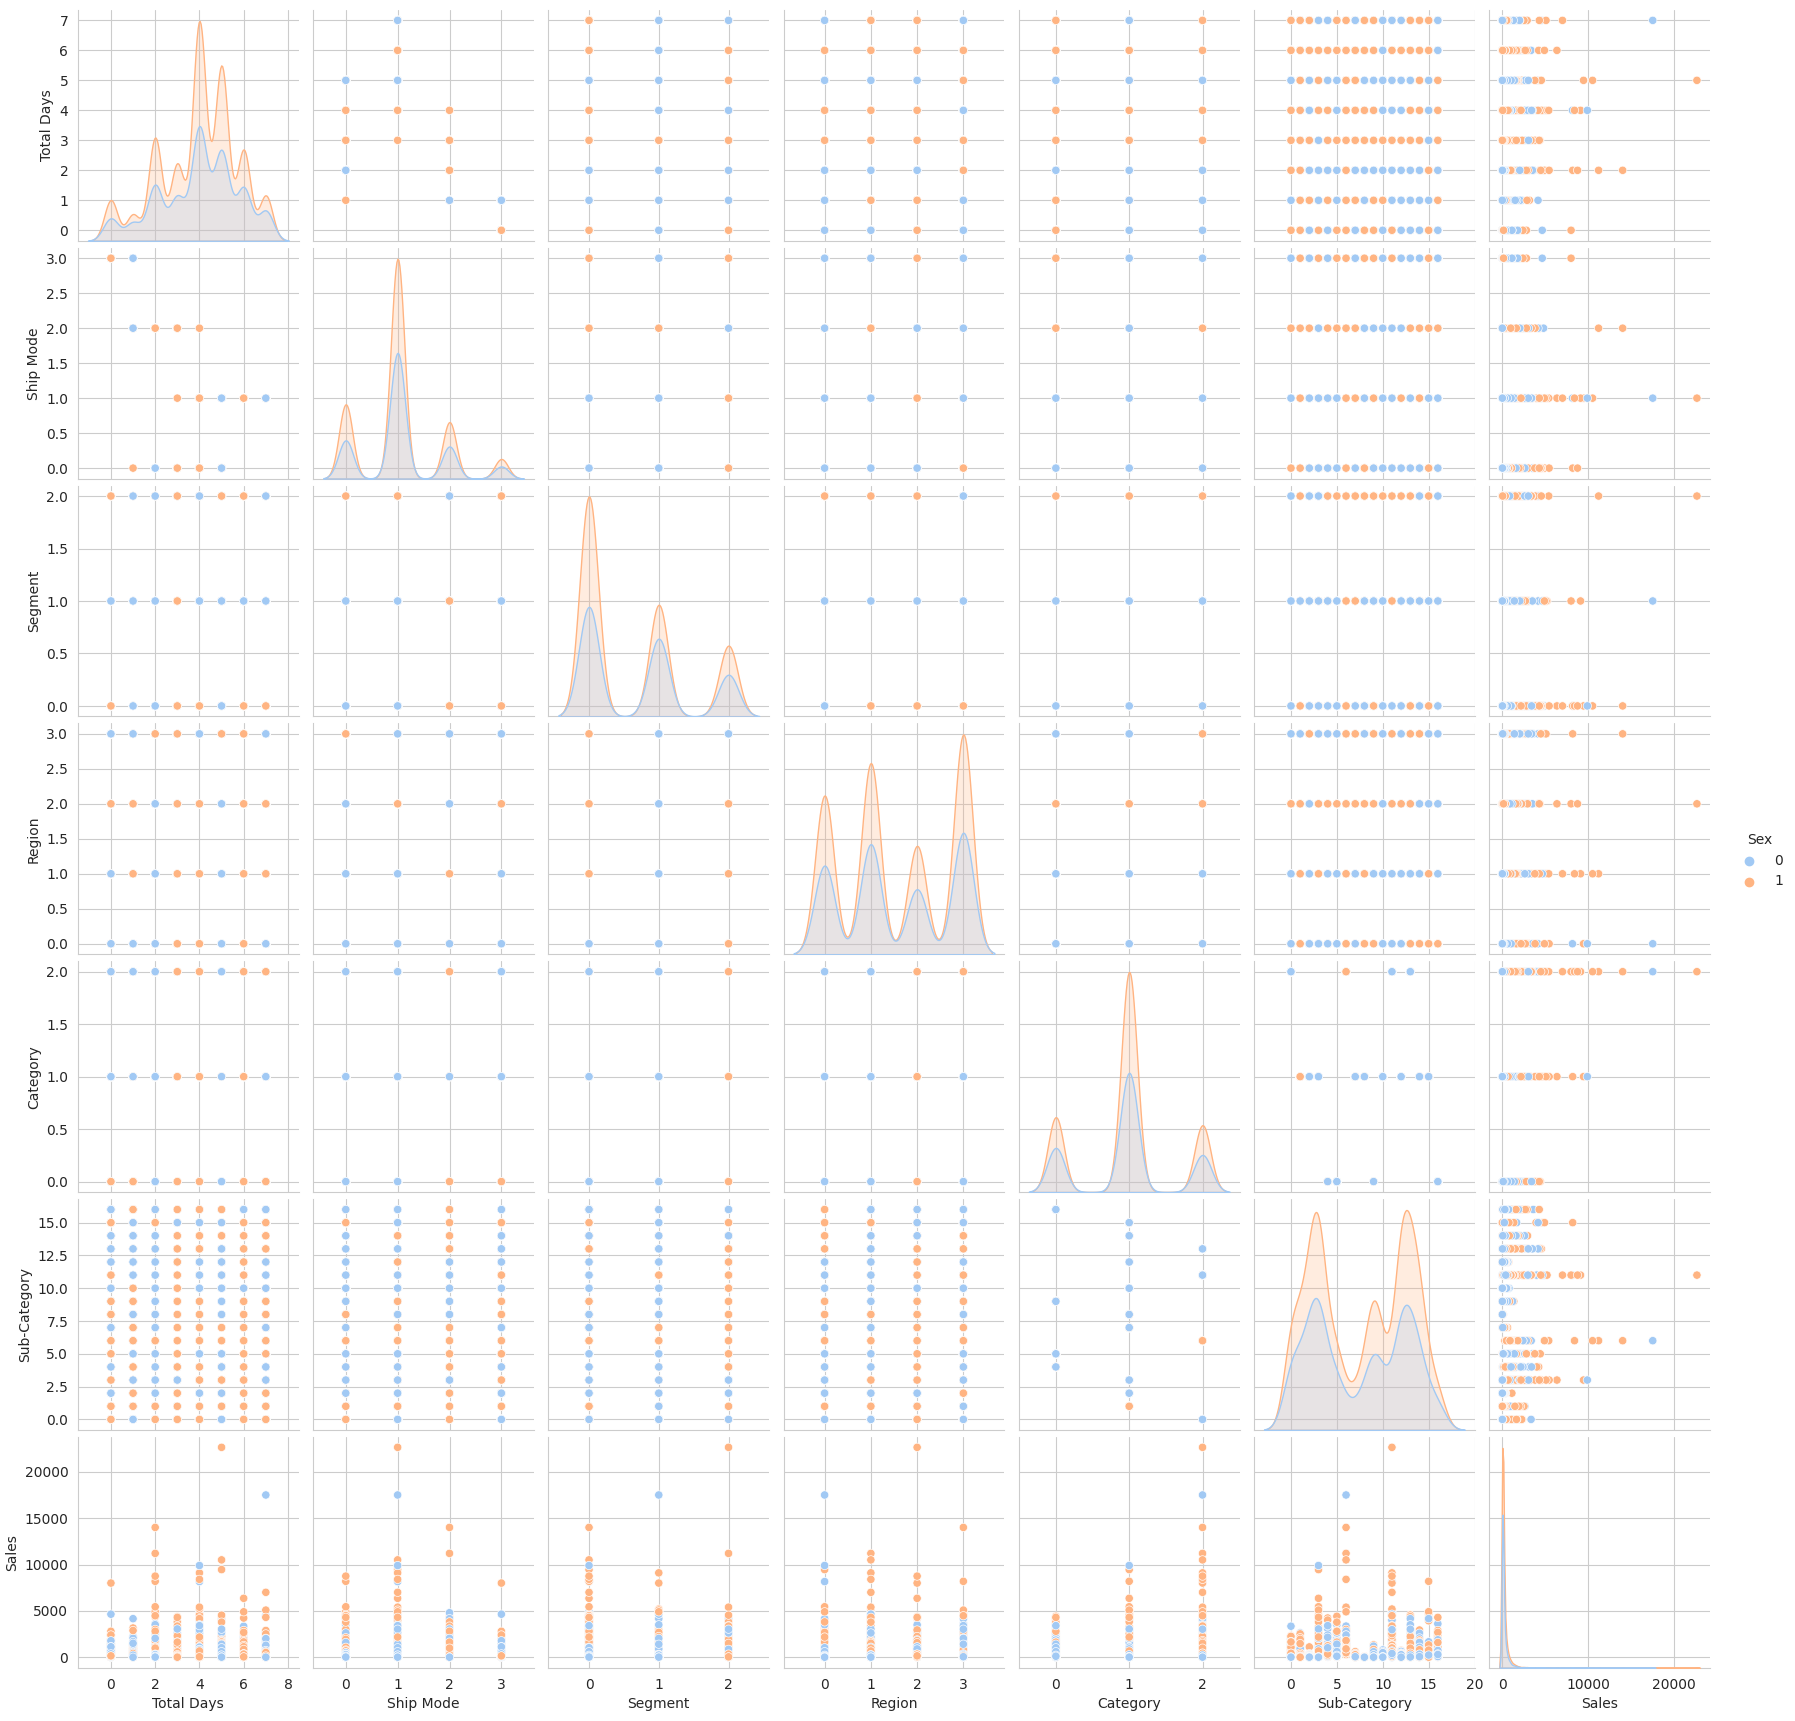

In [270]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="Sex", palette="pastel")

In [271]:
df.head()

,Order ID,Order Date,Ship Date,Total Days,Ship Mode,Customer Name,Sex,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,152156,2017-11-08,2017-11-11,3,0,Claire Gute,0,0,Henderson,Kentucky,2,0,4,Bush Somerset Collection Bookcase,261.9600
1,152156,2017-11-08,2017-11-11,3,0,Claire Gute,0,0,Henderson,Kentucky,2,0,5,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,138688,2017-06-12,2017-06-16,4,0,Darrin Van Huff,1,1,Los Angeles,California,3,1,10,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,108966,2016-10-11,2016-10-18,7,1,Sean O'Donnell,1,0,Fort Lauderdale,Florida,2,0,16,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,108966,2016-10-11,2016-10-18,7,1,Sean O'Donnell,1,0,Fort Lauderdale,Florida,2,1,14,Eldon Fold 'N Roll Cart System,22.3680


In [272]:
encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])  


In [273]:
X = df[['Sex', 'Segment', 'Region', 'Category', 'Sub-Category']]
y = df['State']


In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [275]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [279]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree_model, X, y, cv=kf)
print (f'Acuracia média:{scores.mean():.2f}')
print(f'Desvio Padrao: {scores.std():.2f}')

Acuracia média:0.43
Desvio Padrao: 0.01


In [276]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Previsões
y_pred = tree_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2%}')

# Prever 'State' para um novo produto
new_product = pd.DataFrame({
    'Sex': [0],
    'Segment': [1],
    'Region': [3],
    'Category': [3],
    'Sub-Category': [10]
})
predicted_state_code = tree_model.predict(new_product)
predicted_state = encoder.inverse_transform(predicted_state_code)
print(f'O State previsto para o novo produto é: {predicted_state[0]}')

Acurácia do modelo: 42.66%
O State previsto para o novo produto é: Arizona
